In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from enm.utils import *
from enm.Enm import Enm

In [2]:
e = Enm('rew')

In [71]:
ba = nx.barabasi_albert_graph(10, 2,1111)

In [72]:
import random
random.seed(1)

In [73]:
pos = nx.spring_layout(ba)

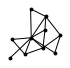

In [74]:
fig, ax = plt.subplots(figsize=(1,1))
nx.draw(ba,node_color='k', pos=pos,ax=ax, node_size=8)
plt.savefig('../reports/figures/paper_figures_052521/fig1_random.png',dpi=150)

In [75]:
e.G = ba

In [76]:
e.giant_component()

In [77]:
e.gnm_analysis()

@> 9 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [78]:
e.prs_mat.shape

(10, 10)

In [79]:
e.figure_path='../reports/figures/paper_figures_052521/'


In [80]:
l = e.L

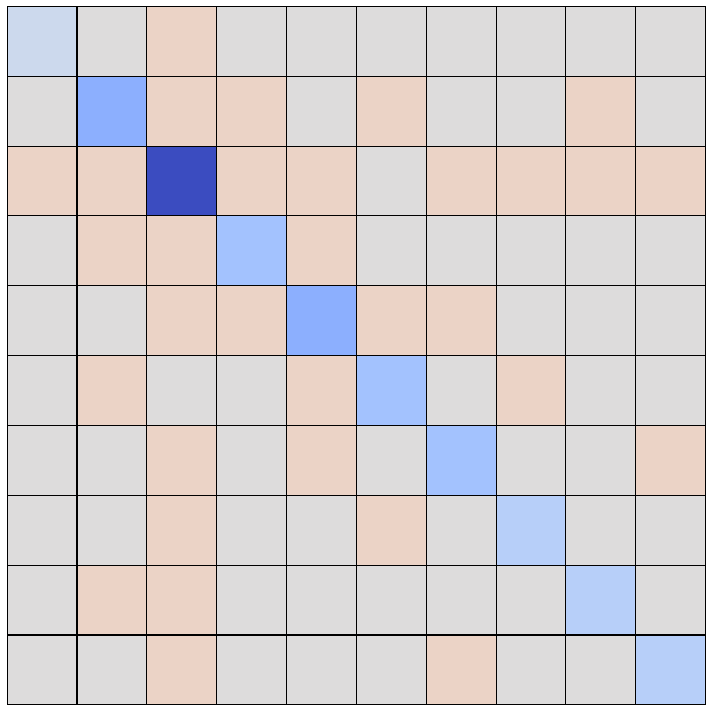

In [106]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(l,center=0,cmap="coolwarm_r",xticklabels=False, vmin=-1,yticklabels=False,linewidths=.1,ax=ax,linecolor='k',cbar=False,rasterized=False)
# ax.axhline(y=0, color='k',linewidth=4)
# ax.axhline(y=l.shape[1], color='k',linewidth=4)
# ax.axvline(x=0, color='k',linewidth=4)
# ax.axvline(x=l.shape[0], color='k',linewidth=4)
plt.tight_layout()
plt.savefig('../reports/figures/paper_figures_052521/fig1_random_laplacian.pdf',dpi=150)

In [98]:
e.cluster_matrix(e.prs_mat)

/home/oma21/enm_package/enm/visualize.py:180: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_heatmap.set_xticklabels(idx1_cl, minor=False)
/home/oma21/enm_package/enm/visualize.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_heatmap.set_yticklabels(idx2_cl, minor=False)


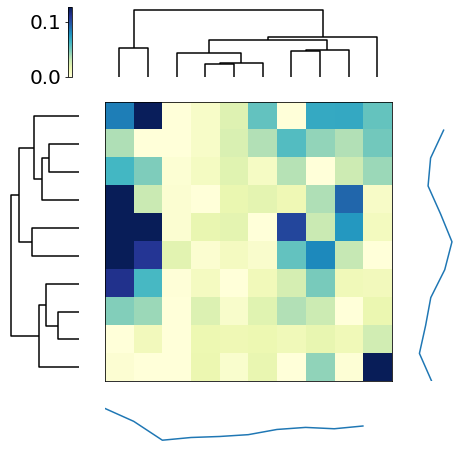

In [100]:
eff, sens = e.heatmap_annotated(figure_name = 'fig1a_4', save_figure=True)

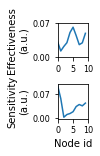

In [101]:
labelsize = 8
fontsize=10
fig, ax = plt.subplots(2,1,figsize=(1.5 ,2.1))
ax[0].plot(range(10),eff)
ax[0].set_ylabel('Effectiveness\n(a.u.)',fontsize=fontsize)
ax[0].set_xlabel('',fontsize=10)
#ax[1].set_xlim(-0.0001,0.0081)
ax[0].set_xlim(-0,10)
ax[0].set_xticks([0,5,10])
ax[0].tick_params(axis='x', labelsize= labelsize)
ax[0].tick_params(axis='y', labelsize= labelsize)
ax[0].set_yticks([0, 0.07])

ax[1].plot(range(10), sens)
ax[1].set_ylabel('Sensitivity\n(a.u.)',fontsize=fontsize)
ax[1].set_xlabel('Node id',fontsize=10)
ax[1].set_xlim(-0,10)
ax[1].tick_params(axis='x', labelsize= labelsize)
ax[1].tick_params(axis='y', labelsize= labelsize)
ax[1].set_yticks([0, 0.07])
ax[1].set_xticks([0,5,10])
plt.tight_layout()
fig.align_ylabels()


fig.savefig('../reports/figures/paper_figures_052521/fig1a_5.pdf', bbox_inches='tight', dpi=150)